# **CAR PRICE PREDICTION**
*With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing CSV file from the Dataset
df=pd.read_csv('/content/drive/MyDrive/Python_Datasets/CarPredictionData.csv')

In [3]:
df

,Unnamed: 0,Brand,Model,Year,Variant,Location,version,Number of Owners,KmDriven,Price
0,0,Hyundai,Grand i10,2015,SPORTZ 1.1 CRDI Manual,Noida,Diesel,1st Owner,29895,358999
1,1,Hyundai,VENUE,2021,S MT 1.2 KAPPA,Noida,Petrol,1st Owner,2589,794699
2,2,Hyundai,Eon,2015,MAGNA PLUS Manual,Noida,Petrol,1st Owner,14940,277699
3,3,Hyundai,i20,2013,ERA 1.4 CRDI Manual,Noida,Diesel,1st Owner,32281,326899
4,4,Hyundai,Grand i10,2015,SPORTS 1.2 VTVT Manual,Noida,Petrol,1st Owner,26307,405999
...,...,...,...,...,...,...,...,...,...,...
3596,3596,Maruti,Baleno,2016,DELTA 1.2 K12 Manual,Mumbai,Petrol,2nd Owner,62591,456099
3597,3597,Maruti,Alto 800,2015,LXI Manual,Mumbai,Petrol,1st Owner,57014,231799
3598,3598,Maruti,Alto 800,2016,LXI Manual,Mumbai,Petrol,1st Owner,50885,258599
3599,3599,Maruti,Swift,2015,VXI Manual,Mumbai,Petrol,3rd Owner,59155,416299


In [4]:
df.drop(df.columns[[0]], axis = 1, inplace = True)

In [5]:
df.shape

(3601, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Brand             3601 non-null   object
 1   Model             3601 non-null   object
 2   Year              3601 non-null   int64 
 3   Variant           3601 non-null   object
 4   Location          3601 non-null   object
 5   version           3601 non-null   object
 6   Number of Owners  3601 non-null   object
 7   KmDriven          3601 non-null   int64 
 8   Price             3601 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 253.3+ KB


In [7]:
df.isnull().sum()

Brand               0
Model               0
Year                0
Variant             0
Location            0
version             0
Number of Owners    0
KmDriven            0
Price               0
dtype: int64

In [8]:
df.dtypes

Brand               object
Model               object
Year                 int64
Variant             object
Location            object
version             object
Number of Owners    object
KmDriven             int64
Price                int64
dtype: object

In [9]:
df["Price"] = df["Price"].astype(int)

In [10]:
df.dtypes

Brand               object
Model               object
Year                 int64
Variant             object
Location            object
version             object
Number of Owners    object
KmDriven             int64
Price                int64
dtype: object

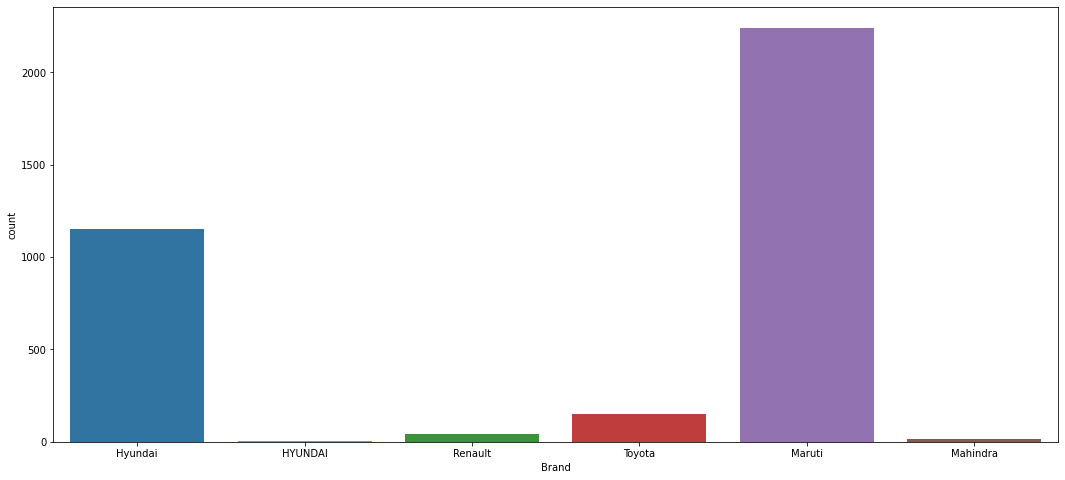

In [11]:
plt.figure(figsize=(18,8))
sns.countplot(df['Brand'])

In [12]:
df.groupby('Brand')['Model'].value_counts()

Brand    Model        
HYUNDAI  NEW I20            3
Hyundai  Grand i10        204
         Elite i20        198
         i10              166
         Verna            133
                         ... 
Toyota   YARIS              3
         Camry              1
         Land Cruiser       1
         Prius              1
         URBAN CRUISER      1
Name: Model, Length: 70, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Brand']=le.fit_transform(df['Brand'])
df['Model']=le.fit_transform(df['Model'])
df['Year']=le.fit_transform(df['Year'])
df['Variant']=le.fit_transform(df['Variant'])
df['Location']=le.fit_transform(df['Location'])
df['version']=le.fit_transform(df['version'])
df['Number of Owners']=le.fit_transform(df['Number of Owners'])

In [14]:
df

,Brand,Model,Year,Variant,Location,version,Number of Owners,KmDriven,Price
0,1,28,8,259,4,0,0,29895,358999
1,1,54,14,244,4,2,0,2589,794699
2,1,19,8,221,4,2,0,14940,277699
3,1,68,6,160,4,0,0,32281,326899
4,1,28,8,251,4,2,0,26307,405999
...,...,...,...,...,...,...,...,...,...
3596,3,6,9,151,3,2,1,62591,456099
3597,3,4,8,206,3,2,0,57014,231799
3598,3,4,9,206,3,2,0,50885,258599
3599,3,49,8,341,3,2,2,59155,416299


In [15]:
df_cor=df.corr()

In [16]:
df_cor

,Brand,Model,Year,Variant,Location,version,Number of Owners,KmDriven,Price
Brand,1.000000,-0.202848,-0.006024,0.359829,-0.149567,-0.124283,-0.027352,0.085504,0.085257
Model,-0.202848,1.000000,-0.323482,0.085799,0.060482,-0.071611,0.067334,0.144197,-0.132085
Year,-0.006024,-0.323482,1.000000,-0.043104,0.066482,-0.077151,-0.267022,-0.414619,0.600579
Variant,0.359829,0.085799,-0.043104,1.000000,-0.095428,0.004972,-0.046122,-0.042068,-0.214799
Location,-0.149567,0.060482,0.066482,-0.095428,1.000000,-0.130511,-0.036408,0.076053,0.056707
version,-0.124283,-0.071611,-0.077151,0.004972,-0.130511,1.000000,0.061036,-0.362495,-0.406446
Number of Owners,-0.027352,0.067334,-0.267022,-0.046122,-0.036408,0.061036,1.000000,0.110365,-0.191751
KmDriven,0.085504,0.144197,-0.414619,-0.042068,0.076053,-0.362495,0.110365,1.000000,-0.093545
Price,0.085257,-0.132085,0.600579,-0.214799,0.056707,-0.406446,-0.191751,-0.093545,1.000000


**Observation :**

Price is highly correlate with Year and least correlate with Brand.

# **Data Visualizations**

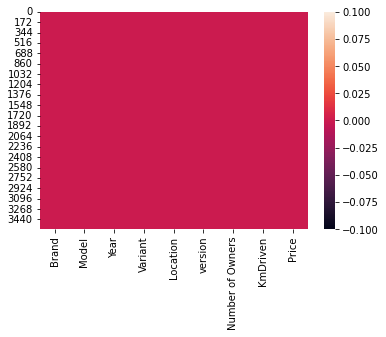

In [17]:
sns.heatmap(df.isnull())

**Observation:** No Null Values.

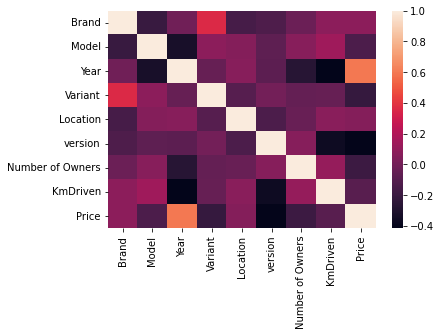

In [18]:
sns.heatmap(df_cor)

**Observation** :
Price is highly correlate with Year and least correlate with version.

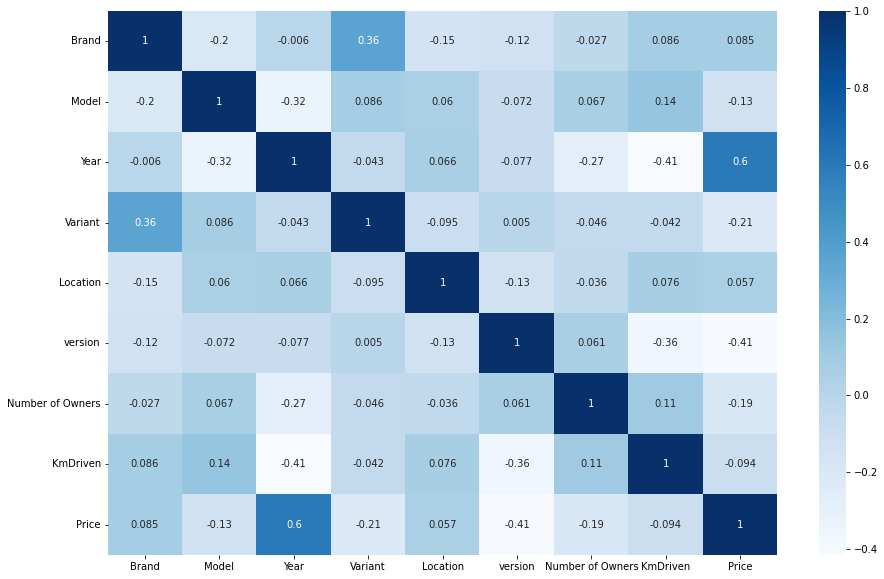

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df_cor,cmap='Blues',annot=True)

**Observation** : Price is highly correlate with Year and least correlate with version.

In [20]:
df.columns

Index(['Brand', 'Model', 'Year', 'Variant', 'Location', 'version',
       'Number of Owners', 'KmDriven', 'Price'],
      dtype='object')

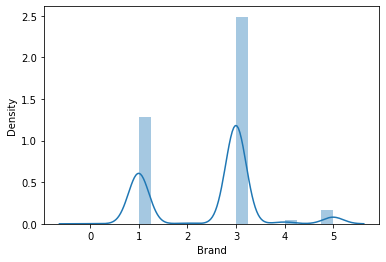

In [21]:
sns.distplot(df['Brand'])

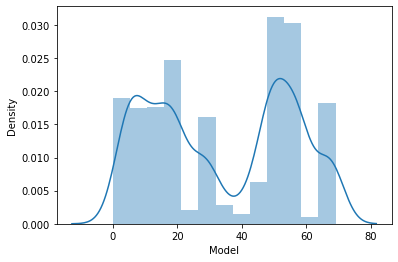

In [22]:
sns.distplot(df['Model'])

**Observation** :No skewness present.

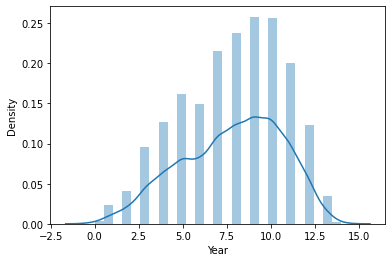

In [23]:
sns.distplot(df['Year'])

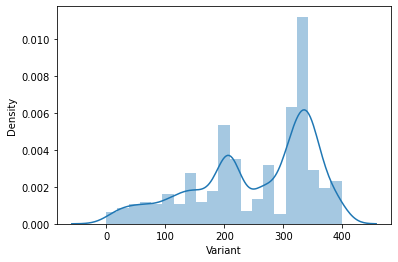

In [24]:
sns.distplot(df['Variant'])

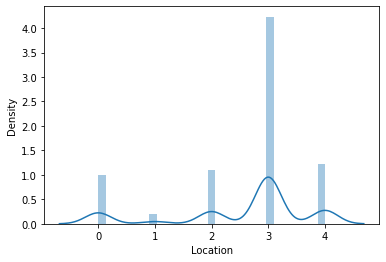

In [25]:
sns.distplot(df['Location'])

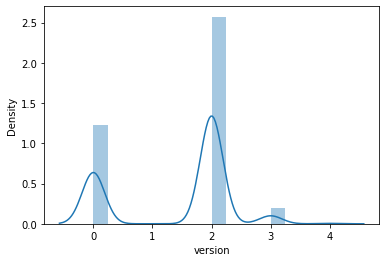

In [26]:
sns.distplot(df['version'])

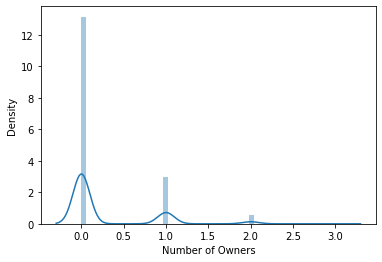

In [27]:
sns.distplot(df['Number of Owners'])

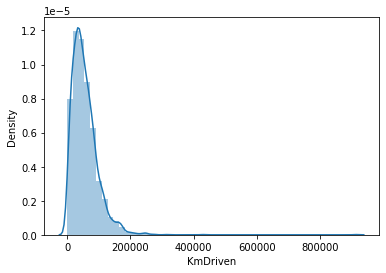

In [28]:
sns.distplot(df['KmDriven'])

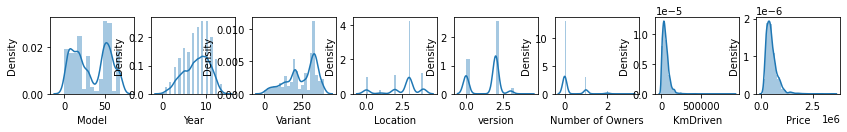

In [29]:
collist=df.columns.values
ncol=14
nrows=15
plt.figure(figsize=(25,25))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

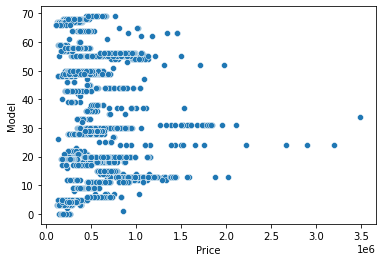

In [30]:
sns.scatterplot(x='Price',y='Model',data=df)

**Observation** :Model is in range between 0 to 130.

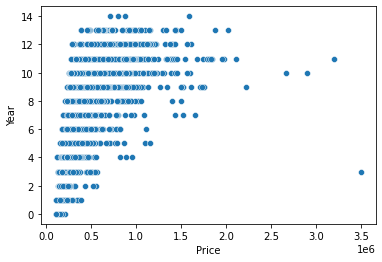

In [31]:
sns.scatterplot(x='Price',y='Year',data=df)

**Observation** :
Year is range between 0 to 13 mainly.

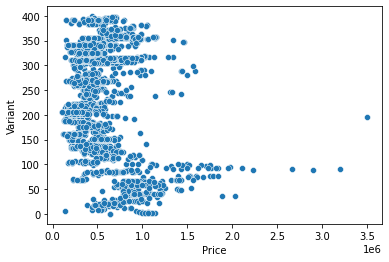

In [32]:
sns.scatterplot(x='Price',y='Variant',data=df)

**Observation** :Variant is scattered between 0 to 600.

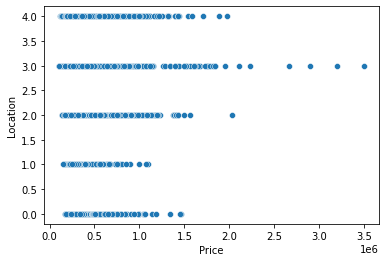

In [33]:
sns.scatterplot(x='Price',y='Location',data=df)

**Observation** :Location is scattered between 0 to 7 range

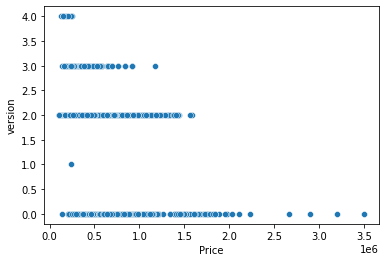

In [34]:
sns.scatterplot(x='Price',y='version',data=df)

**Observation** :
version is scattered mainly between 0,2,3and 4 range.

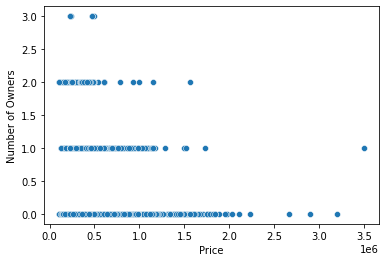

In [35]:
sns.scatterplot(x='Price',y='Number of Owners',data=df)

**Observation** : 
Number of Owners is scattered in between 0 to 3.

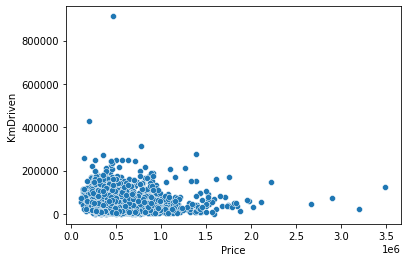

In [36]:
sns.scatterplot(x='Price',y='KmDriven',data=df)

**Observation** :
Km driven is mainly scattered between 0 to 30,000.

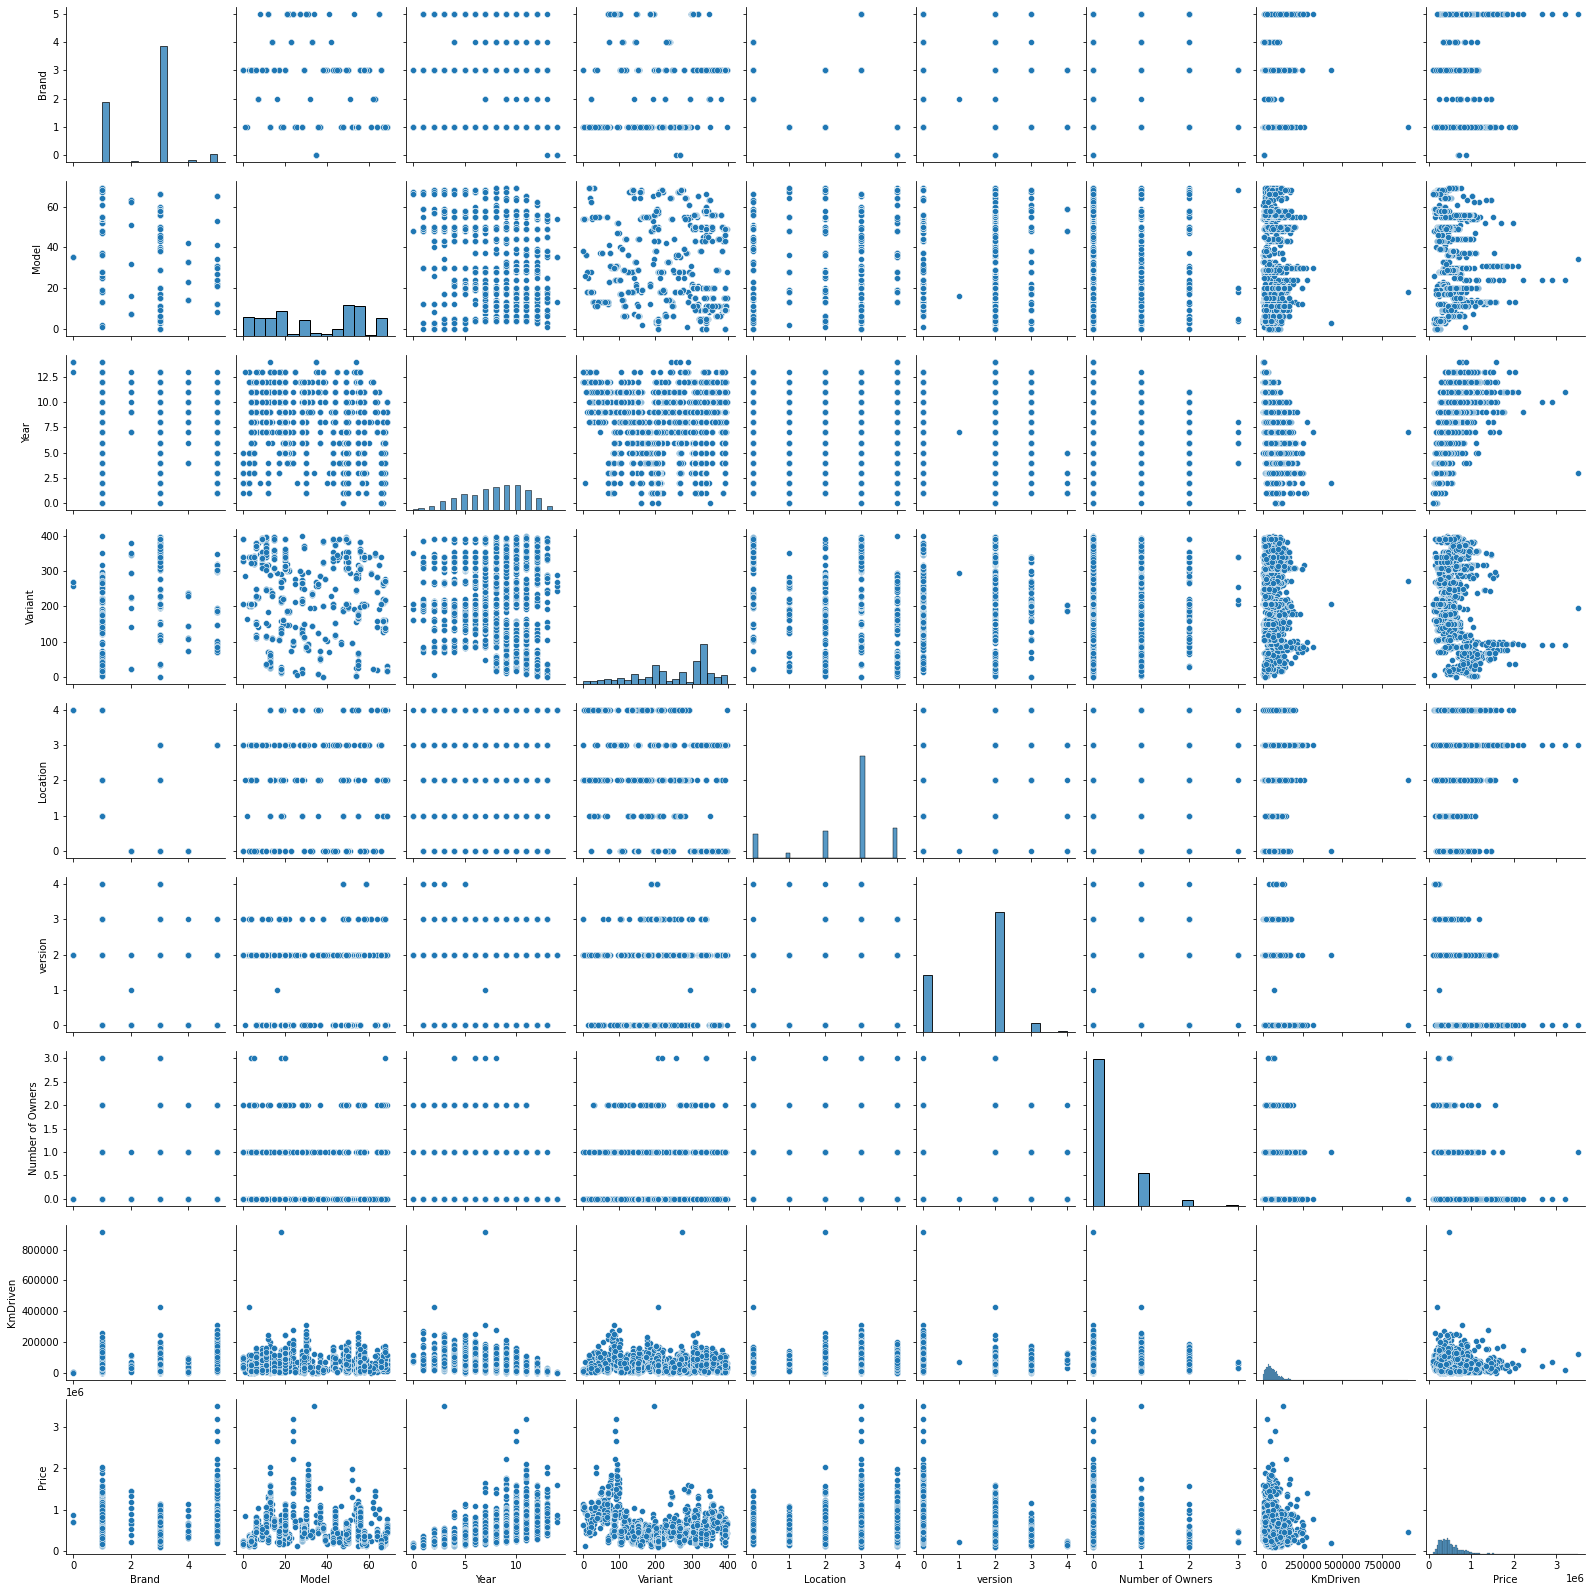

In [37]:
sns.pairplot(df)

In [38]:
df.columns

Index(['Brand', 'Model', 'Year', 'Variant', 'Location', 'version',
       'Number of Owners', 'KmDriven', 'Price'],
      dtype='object')

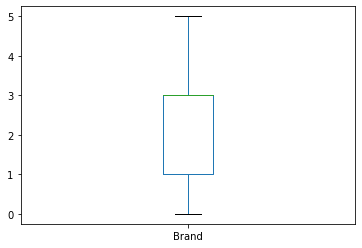

In [39]:
df['Brand'].plot.box()

**Observation** :There are very few outliers so we will keep them instead of removing from data.



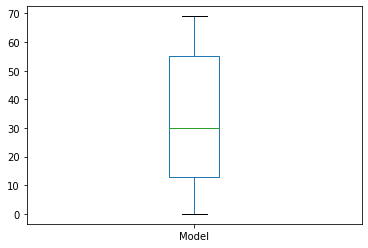

In [40]:
df['Model'].plot.box()

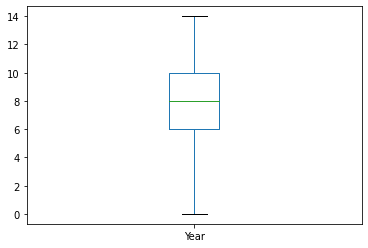

In [41]:
df['Year'].plot.box()

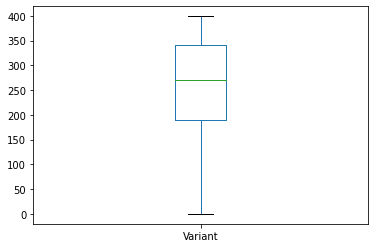

In [42]:
df['Variant'].plot.box()

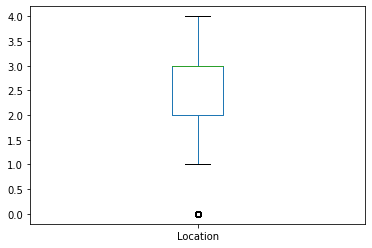

In [43]:
df['Location'].plot.box()

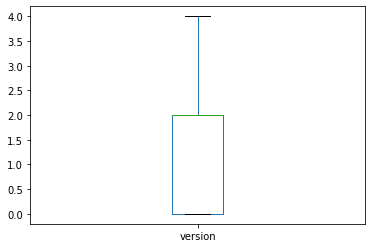

In [44]:
df['version'].plot.box()

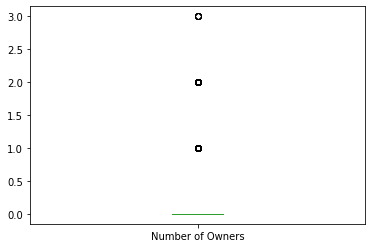

In [45]:
df['Number of Owners'].plot.box()

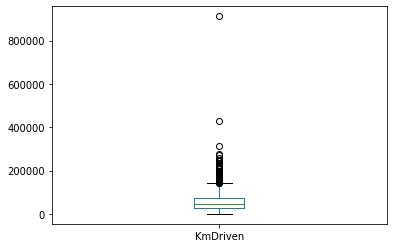

In [46]:
df['KmDriven'].plot.box()

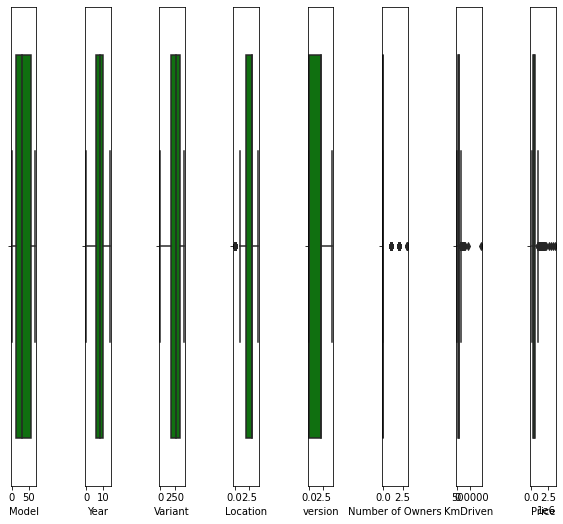

In [47]:
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,6*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# **Removing Outliers**

In [48]:
def outlier_IQR(df,feature_name):
    IQR=df[feature_name].quantile(0.75)-df[feature_name].quantile(0.25)
    lower=df[feature_name].quantile(0.25)-(IQR*1.5)
    upper=df[feature_name].quantile(0.25)+(IQR*1.5)
    return (lower,upper)

In [49]:
df.columns

Index(['Brand', 'Model', 'Year', 'Variant', 'Location', 'version',
       'Number of Owners', 'KmDriven', 'Price'],
      dtype='object')

In [50]:
outlier_IQR(df,'Brand')

(-2.0, 4.0)

In [51]:
df['Brand'].describe()

count    3601.000000
mean        2.449320
std         1.079738
min         0.000000
25%         1.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: Brand, dtype: float64

In [52]:
df.loc[df['Brand']>=13.5,'Brand']=13.5

In [53]:
df['Brand'].describe()

count    3601.000000
mean        2.449320
std         1.079738
min         0.000000
25%         1.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: Brand, dtype: float64

In [54]:
df.loc[df['KmDriven']>=108730.5,'KmDriven']=108730.5

In [55]:
df['KmDriven'].describe()

count      3601.000000
mean      52608.360594
std       30900.771991
min         199.000000
25%       27893.000000
50%       47852.000000
75%       74780.000000
max      108730.500000
Name: KmDriven, dtype: float64

# **Removing skewness**

In [56]:
df.skew()

Brand              -0.114821
Model               0.044481
Year               -0.345861
Variant            -0.631480
Location           -1.131558
version            -0.607032
Number of Owners    2.048579
KmDriven            0.364204
Price               2.354475
dtype: float64

**Observation** :
skewness present in Brand,Variant and Number of Owners.

In [57]:
x=df.iloc[:,0:8]

In [58]:
from sklearn.preprocessing import PowerTransformer
power=PowerTransformer(method='yeo-johnson',standardize=True)
df_new=power.fit_transform(x)
df1=pd.DataFrame(df_new,columns=x.columns)

In [59]:
df1.head()

,Brand,Model,Year,Variant,Location,version,Number of Owners,KmDriven
0,-1.341459,-0.101929,0.020149,0.004285,1.552215,-1.430910,-0.518066,-0.638636
1,-1.341459,0.923978,2.386929,-0.154348,1.552215,0.530095,-0.518066,-2.210923
2,-1.341459,-0.549139,0.020149,-0.391747,1.552215,0.530095,-0.518066,-1.315825
3,-1.341459,1.385048,-0.684974,-0.983357,1.552215,-1.430910,-0.518066,-0.546303
4,-1.341459,-0.101929,0.020149,-0.080683,1.552215,0.530095,-0.518066,-0.783882


In [60]:
df1.skew()

Brand              -0.107953
Model              -0.234796
Year               -0.158313
Variant            -0.405966
Location           -0.390249
version            -0.401321
Number of Owners    1.412892
KmDriven           -0.128053
dtype: float64

In [61]:
y=df.iloc[:,-1]

In [62]:
y

0       358999
1       794699
2       277699
3       326899
4       405999
         ...  
3596    456099
3597    231799
3598    258599
3599    416299
3600    713499
Name: Price, Length: 3601, dtype: int64

In [63]:
x.shape,y.shape

((3601, 8), (3601,))

# **Scaling**

In [64]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df_=mms.fit_transform(df1)
df_x=pd.DataFrame(df_)

In [65]:
x=df_x

In [66]:
x

,0,1,2,3,4,5,6,7
0,0.198308,0.570974,0.504345,0.568601,1.000000,0.00000,0.000000,0.471409
1,0.198308,0.860873,1.000000,0.525992,1.000000,0.40902,0.000000,0.097751
2,0.198308,0.444602,0.504345,0.462225,1.000000,0.40902,0.000000,0.310473
3,0.198308,0.991162,0.356677,0.303316,1.000000,0.00000,0.000000,0.493352
4,0.198308,0.570974,0.504345,0.545778,1.000000,0.40902,0.000000,0.436891
...,...,...,...,...,...,...,...,...
3596,0.597990,0.201656,0.581865,0.281273,0.622766,0.40902,0.982666,0.727093
3597,0.597990,0.149494,0.504345,0.421716,0.622766,0.40902,0.000000,0.688709
3598,0.597990,0.149494,0.581865,0.421716,0.622766,0.40902,0.000000,0.644551
3599,0.597990,0.810860,0.504345,0.814412,0.622766,0.40902,0.998648,0.703633


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [68]:
x_train.shape,x_test.shape

((2412, 8), (1189, 8))

In [69]:
y_train.shape,y_test.shape

((2412,), (1189,))

# MODEL BUILDING

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = r2_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.6401154708027944 on random state 126


In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=40)

In [76]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(lr.score(x_train,y_train))

mean_squared_error: 37290743366.80489
mean_absolute_error: 113353.46717710585
r2_score: 0.5132432637429243
0.5590591272609727


In [77]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(dt.score(x_train,y_train))

mean_squared_error: 22073863837.976845
mean_absolute_error: 39523.40707350901
r2_score: 0.7118694628136263
0.9994594963604899


In [78]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(rf.score(x_train,y_train))

mean_squared_error: 21185403623.6722
mean_absolute_error: 40734.85725241619
r2_score: 0.723466549789215
0.9913906669215243


In [79]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(kn.score(x_train,y_train))

mean_squared_error: 25530098647.449486
mean_absolute_error: 71568.26546463247
r2_score: 0.6667551683880941
0.8797435321249253


In [80]:
sv = SVR()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(sv.score(x_train,y_train))

mean_squared_error: 78405187522.04315
mean_absolute_error: 188852.83897517875
r2_score: -0.023424306897201763
-0.04055320820592678


In [81]:
ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
pred=ab.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(ab.score(x_train,y_train))

mean_squared_error: 35720154399.19335
mean_absolute_error: 124535.64682101631
r2_score: 0.5337441894647884
0.7209094258568465


In [82]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(gb.score(x_train,y_train))

mean_squared_error: 21733670465.13873
mean_absolute_error: 57796.11881322111
r2_score: 0.7163100129584746
0.931591631406603


 **Observation** : DecisionTreeRegressor, RandomForestRegressor and GradientBoostingRegressor performed well.

# **Crossvalidation**

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
lrc = cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Linear Regression:", lrc.mean())

Cross validation score of Linear Regression: 0.5090661221732695


In [85]:
rfc = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest:", rfc.mean())

Cross validation score of Random Forest: 0.8495142409451015


In [86]:
dtc = cross_val_score(dt, x, y, cv=5)
print("Cross validation score of Decision Tree :", dtc.mean())

Cross validation score of Decision Tree : 0.7942339514275967


In [87]:
knc = cross_val_score(kn, x, y, cv=5)
print("Cross validation score of Kneigbors:", knc.mean())

Cross validation score of Kneigbors: 0.69319300428889


In [88]:
svc1 = cross_val_score(sv, x, y, cv=5)
print("Cross validation score of Support Vector:", svc1.mean())

Cross validation score of Support Vector: -0.055721949381050795


In [89]:
adr = cross_val_score(ab, x, y, cv=5)
print("Cross validation score of AdaBoost:", adr.mean())

Cross validation score of AdaBoost: 0.5254014017088771


In [90]:
gbr = cross_val_score(gb, x, y, cv=5)
print("Cross validation score of GradientBoost:", gbr.mean())

Cross validation score of GradientBoost: 0.8235075966464314


**Hyperparameter Tuning with RandomForest Regression**

In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'n_estimators':[10,50,100,150], 'max_depth': np.arange(2,10),
             'criterion':['mse','mae'], 'max_features':['auto','sqrt', 'log2']}

In [93]:
GCV = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=5)
GCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [94]:
#Printing the best parameters.
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 150}

**Model with RandomForest Regression**

In [95]:
model = RandomForestRegressor(n_estimators=150, criterion='mse', max_depth=9, max_features='auto')
model.fit(x_train,y_train)
pred = model.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(model.score(x_train,y_train)*100)

mean_squared_error: 22512354965.367123
mean_absolute_error: 54830.525424941065
r2_score: 0.7061458303307144
95.88384603581534


**Hyperparameter Tuning with Gradient Boosting Regression**

In [96]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'n_estimators':[10,50,100,150], 'max_depth': np.arange(2,10),
             'criterion':['friedman_mse','mse','mae'], 'max_features':['auto','sqrt', 'log2'],
              'loss':['ls', 'lad', 'huber', 'quantile']}

In [97]:
GCV = RandomizedSearchCV(GradientBoostingRegressor(), parameters, cv=5)
GCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [98]:
#Printing the best parameters.
GCV.best_params_

{'criterion': 'friedman_mse',
 'loss': 'ls',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 100}

**Model with Gradient Boosting Regression**

In [99]:
model1 = GradientBoostingRegressor(n_estimators=150, criterion='mse', max_depth=4, max_features='log2',loss='ls')
model1.fit(x_train,y_train)
pred1 = model1.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(model1.score(x_train,y_train)*100)

mean_squared_error: 22512354965.367123
mean_absolute_error: 54830.525424941065
r2_score: 0.7061458303307144
96.56710071941234


**Observation** :Both model performed well and output are same. We will save model with random forest.

# **SAVING THE MODEL**

In [100]:
import joblib
joblib.dump(model,"car_price_prediction_submission.pkl")

['car_price_prediction_submission.pkl']